In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/adaptive-signal-processing
    from os import chdir as cd
    cd('/content/notebooks/')
    ! pip install -e .
    ! pip install SciencePlots

import sympy as sp
from sympy import latex
import numpy as np
from IPython.display import Math, Latex, display
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import HTML
from IPython.display import Image
try:
    import scienceplots
except:
    ! pip install SciencePlots
    
from utils import set_preferences, genConvGIF, symdisp, round_expr

plt.style.use(['science','ieee'])
set_preferences()

plt.rcParams['figure.figsize'] = [5, 2.5]
plt.rcParams['figure.dpi'] = 150

saveFigures = False
figurePath = 'G:\\Meu Drive\\DEE UFCG\\Disciplinas e ementas\\TEEE - Processamento adaptativo de sinais\\lecture notes\\figures\\'

# Adaptive Filtering Fundamentals

## Newton's Method for Optimization

Newton's method is an iterative technique used to find the local maximum or minimum of a differentiable function. It leverages both the first and second derivatives (i.e., the gradient and Hessian) to achieve faster convergence compared to methods that only use the gradient, like gradient descent.

**Mathematical Foundation:**

For a twice-differentiable function $f(\mathbf{x})$, Newton's method uses a second-order Taylor series approximation around a point $\mathbf{x}_k$:

$$
f(\mathbf{x}) \approx f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)^\top (\mathbf{x} - \mathbf{x}_k) + \frac{1}{2} (\mathbf{x} - \mathbf{x}_k)^\top \nabla^2 f(\mathbf{x}_k) (\mathbf{x} - \mathbf{x}_k)
$$

Here:
- $\nabla f(\mathbf{x}_k)$ is the gradient of $f$ at $\mathbf{x}_k$.
- $\nabla^2 f(\mathbf{x}_k)$ is the Hessian matrix of $f$ at $\mathbf{x}_k$.

The goal is to find the point $\mathbf{x}_{k+1}$ where the gradient of $f(\mathbf{x})$ is zero, indicating a local extremum.

**Iteration Update:**
Newton's method updates the point $\mathbf{x}_k$ using the following rule:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{H}_f^{-1}(\mathbf{x}_k) \nabla f(\mathbf{x}_k)
$$

Where:
- $\mathbf{H}_f(\mathbf{x}_k)$ is the Hessian matrix at $\mathbf{x}_k$.
- $\mathbf{H}_f^{-1}(\mathbf{x}_k)$ is the inverse of the Hessian matrix.
- $\nabla f(\mathbf{x}_k)$ is the gradient at $\mathbf{x}_k$.

**Interpretation:**
- **Gradient** $\nabla f(\mathbf{x}_k)$: Points in the direction of steepest ascent.
- **Hessian** $\mathbf{H}_f(\mathbf{x}_k)$: Provides curvature information, allowing the method to adjust step sizes based on the landscape of the function.

**Convergence:**
- **Quadratic Convergence:** When close to a local optimum and assuming the Hessian is positive definite, Newton's method has quadratic convergence, meaning the error decreases exponentially.
- **Potential Issues:** If the Hessian is not positive definite, the method may converge to a saddle point instead of a minimum. Additionally, calculating and inverting the Hessian can be computationally expensive for large problems.

**Application:**
Newton's method is effective for optimization problems where the function is well-behaved (i.e., smooth, with a well-defined second derivative). It is particularly useful in machine learning, physics, and engineering applications where precision is critical.

### Example:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Convergence achieved after 11 iterations.
Minimum value of f(x) = f(-1.673) = 8.024


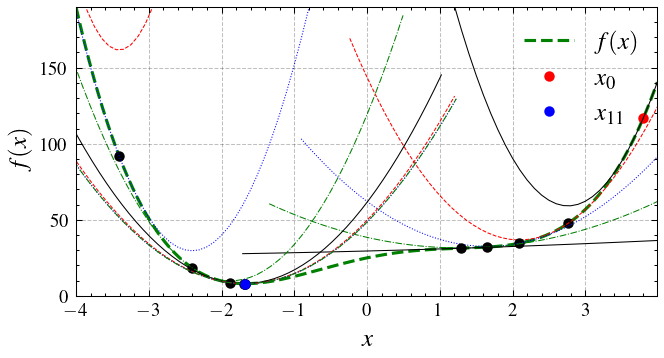

In [4]:
x, u = sp.symbols('x, Δx', real=True)

# Objective function
f = 0.8*x**4 -x**3 - 4*x**2 + 10*x + 25

#f = 4*x**2 + 10*x + 25 

symdisp('f(x) = ', f)

# Calculate derivatives
dfdx = sp.diff(f,x)
d2fdx2 = sp.diff(dfdx,x)

symdisp('\\frac{df(x)}{dx} = ', dfdx)
symdisp('\\frac{d^2f(x)}{dx^2} = ', d2fdx2)

# lambdify to speed up numerical calculations
f_lamb = sp.lambdify(x, f)
df_lamb = sp.lambdify(x, dfdx)
d2f_lamb = sp.lambdify(x, d2fdx2)

domain = np.arange(-4, 4, 0.01)
y = f_lamb(domain)
plt.plot(domain, y,'--g', linewidth=1.5, label='$f(x)$')

# Find extreme points of f(x) using Newton's method

# Parameters
μ = 1               # step size
x0 = 3.8              # initial guess
max_iterations = 50   # maximum number of iterations
tol = 1e-4            # absolute tolerance

domain_approx = np.arange(-3,3,0.1)  

# Run iterations of Newton's algorithm
xk = x0
for k in range(max_iterations):
    symdisp(f'iteration\;{k}: x_k = {xk:.3f}', )
        
    if k == 0:
        plt.plot(xk, f_lamb(xk),'ro', markersize=4, label='$x_0$')
    elif k == max_iterations-1:
        plt.plot(xk, f_lamb(xk),'bo', markersize=4, label=f'$x_{k}$')
    else:
        plt.plot(xk, f_lamb(xk),'ko', markersize=4)        
    
    # approximate f(x) with a quadratic function (parabola) around xk
    f_approx = f_lamb(xk) + df_lamb(xk)*u + (1/2)*d2f_lamb(xk)*u**2 
    symdisp(f'f({xk:.3f} + Δx) = ', f_approx, numDig=4)
    
    # plot approximation at iteration k
    f_approx_lamb = sp.lambdify(u, f_approx)    
    plt.plot(domain_approx+xk, f_approx_lamb(domain_approx))
        
    xk_ = xk # save previous xk value
    
    # Newton's algorithm update:
    xk -= μ*df_lamb(xk)/d2f_lamb(xk)   
    
    # Verify convergence of the algorithm
    if np.abs(xk-xk_) < tol:
        print(f'Convergence achieved after {k} iterations.')
        plt.plot(xk, f_lamb(xk),'bo', markersize=4, label=f'$x_{{{k}}}$')
        print(f'Minimum value of f(x) = f({xk:.3f}) = {f_lamb(xk):.3f}')
        break # Stop iterations if tolerance is met
        

plt.ylim(0, y.max())
plt.xlim(domain.min(), domain.max())
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$f(x)$');    

if saveFigures:
    plt.savefig(figurePath + 'Newton_method_1D_example.png', dpi=600)

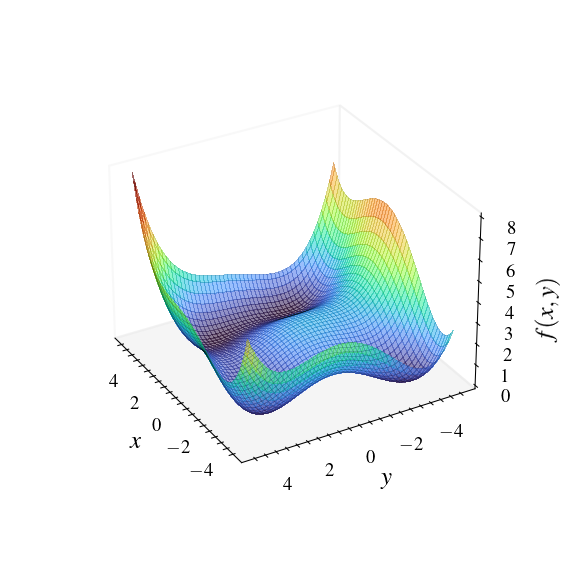

In [5]:
x, y = sp.symbols('x, y', real=True)

def gradient(f):
    # Returns the symbolic gradient vector of f(x,y)
    return sp.Matrix([[f.diff(x)],[f.diff(y)]])

def hessian(f):
    # Returns the symbolic Hessian matrix of f(x,y)
    return sp.Matrix([[f.diff(x).diff(x), f.diff(x).diff(y)],
                      [f.diff(y).diff(x), f.diff(y).diff(y)]])

# Objective function
#f_obj = (4*x**2 + 10*x + 25) + (0.2*y**4 -0.7*y**3 - 4*y**2 + 10*y + 25) + 0.1*x*y
f_obj = ((x**2 + y - 11)**2 + (y**2 + x - 7)**2)/100
#f_obj = x**2 + y**2

f_obj_lamb = sp.lambdify([x, y], f_obj)
domain = np.arange(-5, 5, 0.1)
x_domain, y_domain = np.meshgrid(domain, domain)

z = f_obj_lamb(x_domain, y_domain)

fig = plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

# Plot the surface.
ax.plot_surface(x_domain, y_domain, z, cmap=cm.turbo, alpha=0.55, linewidth=0.05, antialiased=False)

# Make panes transparent
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane

wire = ax.plot_wireframe(x_domain, y_domain, z, color='k', linewidth=0.05)
fig.tight_layout()
ax.grid(False)

ax.view_init(elev=30, azim=150)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')
ax.set_box_aspect(aspect=None, zoom=0.75)
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Convergence achieved after 6 iterations.
Minimum value of f(x) = f(3.584,-1.848) = 0.000


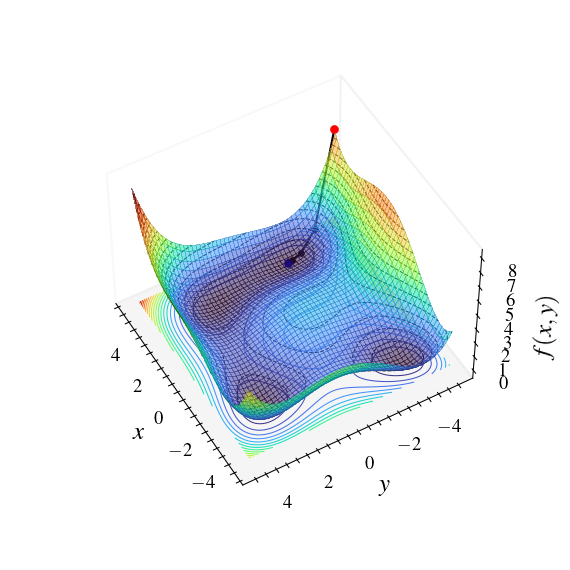

In [6]:
fig = plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

# Plot the objective function surface.
ax.plot_surface(x_domain, y_domain, z, cmap=cm.turbo, alpha=0.55, linewidth=0.05, antialiased=False)
ax.contour(x_domain, y_domain, z, 20, zdir='z', offset=0, cmap=cm.turbo)
ax.contour(x_domain, y_domain, z, 20, colors="k", linestyles="dashed")

# Make panes transparent
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane

wire = ax.plot_wireframe(x_domain, y_domain, z, color='k', linewidth=0.05)
fig.tight_layout()
ax.grid(False)


# Optimization

# Calculate derivatives
grad = gradient(f_obj)
hess = hessian(f_obj)

# lambdify to simplify numerical calculations
grad_lamb = sp.lambdify([x,y], grad)
hess_lamb = sp.lambdify([x,y], hess)

# Find extreme points of f(x) using Newton's method

# Parameters
μ = 1                      # step size
x0 = np.array([[5], [-5]],dtype=np.float64)  # initial guess
max_iterations = 50         # maximum number of iterations
tol = 1e-4                  # absolute tolerance
method = 'Newton' # 'Newton'|'gradient'

# Run iterations of optimization algorithms
xk = x0
x_next = xk[0][0]
y_next = xk[1][0]

for k in range(max_iterations):    
    symdisp(f'iteration\;{k}: x_k = {x_next:.3f}, y_k = {y_next:.3f}', )
    
    # plot trajectory of (xk, yk, f(xk,yk))
    if k > 0:
        x_plot = [x_previous, x_next]
        y_plot = [y_previous, y_next]
        z_plot = [f_obj_lamb(x_previous, y_previous),f_obj_lamb(x_next, y_next)]   
    
    if k == 0:
        ax.scatter(x_next, y_next, f_obj_lamb(x_next, y_next),color='r', s=10, label='$x_0$')        
    elif k == max_iterations-1:
        print(f'Reached max iterations.')
        ax.scatter(x_next, y_next, f_obj_lamb(x_next, y_next), color='b', s=10, label=f'$x_{k}$')
        print(f'Minimum value of f(x) = f({x_next:.3f},{y_next:.3f}) = {f_obj_lamb(x_next, y_next):.3f}')
    else:          
        ax.plot(x_plot, y_plot, z_plot,'-o', linewidth = 1, color='k', label=f'$x_{k}$')
                      
    # save previous xk value for plotting
    x_previous = xk[0][0]
    y_previous = xk[1][0]
    
    # Optimization step
    if method == 'Newton':
        # Newton's algorithm update:
        Δx = -μ * np.linalg.inv(hess_lamb(x_next, y_next)) @ grad_lamb(x_next, y_next)       
    elif method == 'gradient':  
        # Gradient descent algorithm update:
        Δx = -μ * grad_lamb(x_next, y_next)
        
    # update current estimate of parameters    
    xk += Δx
    
    x_next = xk[0][0]
    y_next = xk[1][0]
    
    # Verify convergence of the algorithm
    if np.sum(np.abs(Δx)) < tol:
        print(f'Convergence achieved after {k} iterations.')
        ax.scatter(x_next, y_next, f_obj_lamb(x_next, y_next), color='b', s=10, label=f'$x_{k}$')        
        print(f'Minimum value of f(x) = f({x_next:.3f},{y_next:.3f}) = {f_obj_lamb(x_next, y_next):.3f}')
        break # Stop iterations if tolerance is met

ax.view_init(elev=50, azim=150)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')
ax.set_box_aspect(aspect=None, zoom=0.75)
plt.show()

## Gradient optimization of FIR filters parameters

In [7]:
def gradientAdaptation(x, y, Ntaps=5, μ=1e-3, epochs=2):
    """
    Perform gradient adaptation to update filter coefficients of an FIR filter.

    Parameters
    ----------
    x : ndarray
        Input signal array to be processed.
    y : ndarray
        Reference signal array that the input signal is compared against.
    Ntaps : int, optional
        Number of taps (coefficients) for the filter, by default 5.
    μ : float, optional
        Step size (learning rate) for the gradient adaptation, by default 1e-3.
    epochs : int, optional
        Number of epochs (iterations) over the entire signal, by default 2.

    Returns
    -------
    out : ndarray
        Array containing the estimated signal after filtering.
    H : ndarray
        Array containing the history of filter coefficients over time. 
        Shape is `(epochs * len(y) + 1, Ntaps)`.
    errors : ndarray
        Array containing the error between the estimated signal and the reference signal 
        at each step. Length is `epochs * len(y)`.

    Notes
    -----
    This function applies a gradient-based adaptation algorithm to update the coefficients
    of an FIR filter. The filter attempts to minimize the error between the estimated
    signal (`y_hat`) and the reference signal (`y`) by adjusting its coefficients based 
    on the gradient of the error with respect to the coefficients.

    The function can iterate multiple times (`epochs`) over the entire input signal to 
    refine the filter coefficients.
    
    The filter coefficients are updated using the rule:

        `h[k] = h[k] + μ * error * x_vec[k]`
    
    where `h` are the filter coefficients, `μ` is the learning rate, `error` is the difference
    between the reference signal and the estimated signal, and `x_vec[k]` are the delayed 
    versions of the input signal.
    """
    # Initialize filter coefficients
    h = np.zeros(Ntaps)       
    L = Ntaps//2
    N = len(y)

    # Gradient adapation algorithm
    errors = np.zeros(epochs*N)
    out  = np.zeros(y.shape)
    ind = np.arange(0,Ntaps)
    H = np.zeros((epochs*len(y)+1, Ntaps))

    x = np.pad(x,(Ntaps-1,0))

    # Iterate through each sample of the signal
    for epoch in range(epochs):
        for i in range(0, len(x)-Ntaps):
            x_vec = x[i+ind][-1::-1] # x[i-k]

            # Generate the estimated signal using the equalizer filter
            y_hat = np.sum(h*x_vec)

            # Compute the error between the estimated signal and the reference signal
            error = y[i] - y_hat

            # Update the filter coefficients using the gradient update rule
            h += μ * error * x_vec  
            
            H[i + epoch*N + 1,:] = h
            errors[i + epoch*N] = error
            out[i] = y_hat       
    
    return out, H, errors

 ### System identification example

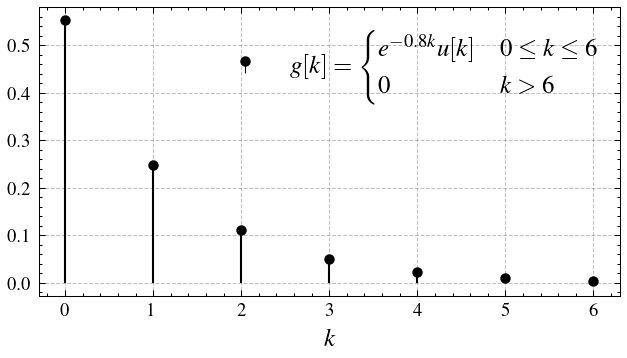

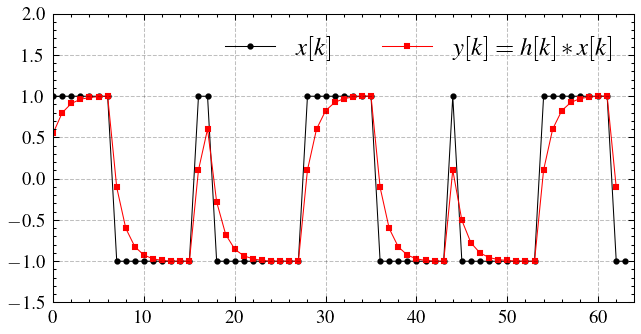

In [14]:
from scipy.signal import square
from utils import random_square_signal

periods = 4   
T = 16     # period of the square wave in samples
Nsamples = periods*T

n = np.arange(Nsamples)

# Generate the square wave
#x = 1 * (n % T < T // 2) - 1 * (n % T >= T // 2)
x = 2*random_square_signal(Nsamples, T, 0.5)-1

L = 7
g = np.exp(-0.8*n)
g = g[0:L]
g = g/g.sum()

plt.figure()
markerline, stemlines, baseline =plt.stem(g, 'k', basefmt=" ", 
                                          label='$g[k] = \\begin{cases} e^{-0.8k}u[k] & 0\\leq k \\leq 6 \\\ 0 & k>6 \\end{cases}$', 
                                          markerfmt='o')
markerline.set_markersize(4)
stemlines.set_linewidth(1)
plt.grid()
plt.legend()
plt.xlabel('$k$')

plt.figure()
y = np.convolve(g, x, mode='full')[:-L]
plt.plot(x,'-o',label='$x[k]$')
plt.plot(y,'-s',label='$y[k] = h[k] \\ast x[k]$')
plt.legend(loc='upper right',ncol=2)
plt.ylim(-1.5,2)
plt.xlim(0,Nsamples)
plt.grid()

(0.0, 63.0)

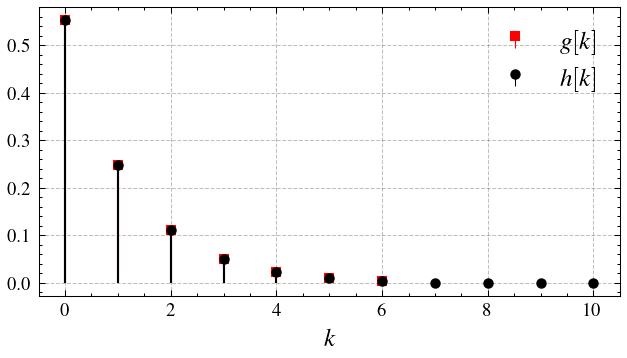

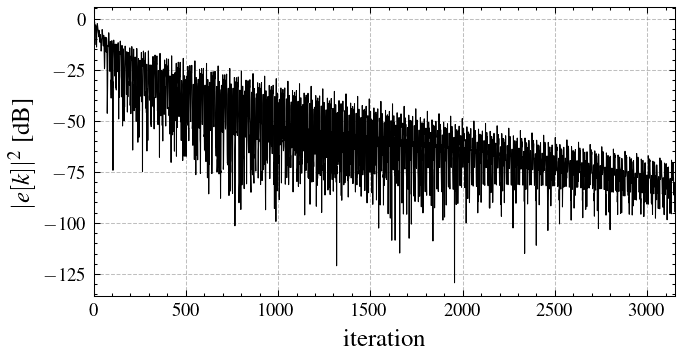

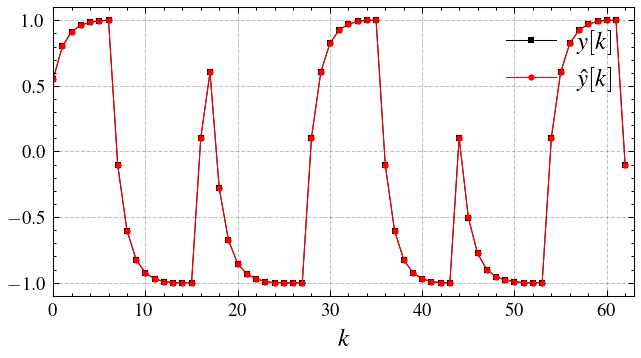

In [15]:
out, H, errors = gradientAdaptation(x, y, Ntaps=11, μ=1e-2, epochs=50)

h = H[-1,:]

plt.figure()
markerline, stemlines, baseline =plt.stem(g, 'r', basefmt=" ", label='$g[k]$', markerfmt='s')
markerline.set_markersize(4), stemlines.set_linewidth(1)
markerline, stemlines, baseline =plt.stem(h, 'k', basefmt=" ", label='$h[k]$', markerfmt='o')
markerline.set_markersize(4), stemlines.set_linewidth(1)
plt.grid()
plt.legend()
plt.xlabel('$k$')


plt.figure()
plt.plot(10*np.log10(errors**2))
plt.xlabel('iteration')
plt.ylabel('$|e[k]|^2$ [dB]')
plt.grid()
plt.xlim(0, len(errors))

plt.figure()
plt.plot(y,'-s', label='$y[k]$')
plt.plot(out,'-o', label='$\hat{y}[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')
plt.xlim(0, len(y))

KeyboardInterrupt: 

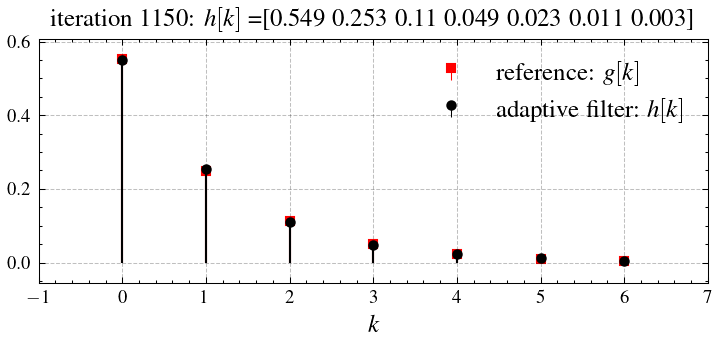

In [10]:
from utils import genTapsUpdateGIF

figName = "tap_adaptation.gif"
xlabel = "$k$"
ylabel = "$h[k]$"
inter = 400
period = 50

figName  = './tapAdaptationFig1.gif'
genTapsUpdateGIF(H[0:3000,:], figName, period, g,  xlabel, ylabel, inter)

Image('./tapAdaptationFig1.gif', width=800)

In [ ]:
from scipy.signal import freqz

fs = 1

plt.figure()

ω, g_freq = freqz(b=g, a=1)
freqs = ω * fs * 1.0 / (2 * np.pi)
Gfreq = 20*np.log10(np.abs(g_freq))
plt.plot(freqs, Gfreq, '-r', label = '$|G(f)|$', linewidth=1)
plt.xlim(0,0.5);

for ind in [10, 100, 1000, 3000]:
    ω, h_freq = freqz(b=H[ind,:], a=1)
    freqs = ω * fs * 1.0 / (2 * np.pi)
    Hfreq = 20*np.log10(np.abs(h_freq))
    plt.plot(freqs, Hfreq,label = f'$|H(f)|$ iter = {ind}', linewidth=1)
    
plt.ylabel('Amplitude response [dB]')
plt.xlabel('$\hat{f}$')
plt.title('Adaptive filter: $|H(f)|$, System: $|G(f)|$')
plt.grid(which='both', linestyle='-', color='grey')
plt.legend(bbox_to_anchor=(1, 1));

 ### Equalization example

In [ ]:
out, H, errors = gradientAdaptation(y, x, Ntaps=5, μ=1e-1, epochs=50)

h = H[-4,:]

plt.figure()
markerline, stemlines, baseline =plt.stem(g, 'r', basefmt=" ", label='$g[k]$', markerfmt='s')
markerline.set_markersize(4), stemlines.set_linewidth(1)
markerline, stemlines, baseline =plt.stem(h, 'k', basefmt=" ", label='$h[k]$', markerfmt='o')
markerline.set_markersize(4), stemlines.set_linewidth(1)
plt.grid()
plt.legend()
plt.xlabel('$k$')


plt.figure()
plt.plot(10*np.log10(errors**2))
plt.xlabel('iteration')
plt.ylabel('$|e[k]|^2$ [dB]')
plt.grid()
plt.xlim(0, len(errors))

plt.figure()
plt.plot(y,'-s', label='$y[k]$')
plt.plot(out,'-o', label='$\hat{y}[k]$')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$k$')
plt.xlim(0, len(y))

In [ ]:
fs = 1

plt.figure()

ω, g_freq = freqz(b=g, a=1)
freqs = ω * fs * 1.0 / (2 * np.pi)
Gfreq = 20*np.log10(np.abs(g_freq))
plt.plot(freqs, Gfreq, '-r', label = '$|G(f)|$', linewidth=1)
plt.xlim(0,0.5);

for ind in [10, 100, 1000, 3000]:
    ω, h_freq = freqz(b=H[ind,:], a=1)
    freqs = ω * fs * 1.0 / (2 * np.pi)
    Hfreq = 20*np.log10(np.abs(h_freq))
    plt.plot(freqs, Hfreq,label = f'$|H(f)|$ iter = {ind}', linewidth=1)
    
plt.ylabel('Amplitude response [dB]')
plt.xlabel('$\hat{f}$')
plt.title('Adaptive filter: $|H(f)|$, System: $|G(f)|$')
plt.grid(which='both', linestyle='-', color='grey')
plt.legend(bbox_to_anchor=(1, 1));

### References

[Virtual Library of Simulation Experiments:Test Functions and Datasets](https://www.sfu.ca/~ssurjano/optimization.html)

[Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)